In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Keras is a higher level version of tensorflow, allowing you to build neural networks in a few lines of code as compared to tensorflow

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

	keras.datasets:
	•	This is a module within the tensorflow.keras library that provides access to several popular datasets. The datasets module contains various datasets that can be easily loaded and used for training and testing machine learning models.
    
	mnist:
	•	This is a specific dataset within keras.datasets. The MNIST dataset consists of 60,000 training images and 10,000 test images of handwritten digits, each labeled with the corresponding digit (0–9).

	•	(X_train_full, y_train_full): This tuple contains the training images (X_train_full) and their corresponding labels (y_train_full).
	•	X_train_full: A NumPy array of shape (60000, 28, 28) containing 60,000 training images. Each image is 28x28 pixels.
	•	y_train_full: A NumPy array of shape (60000,) containing the labels for the training images. Each label is an integer from 0 to 9 representing the digit in the image.
	•	(X_test, y_test): This tuple contains the test images (X_test) and their corresponding labels (y_test).
	•	X_test: A NumPy array of shape (10000, 28, 28) containing 10,000 test images. Each image is 28x28 pixels.
	•	y_test: A NumPy array of shape (10000,) containing the labels for the test images. Each label is an integer from 0 to 9 representing the digit in the image.

In [3]:
X_train_full.shape

(60000, 28, 28)

There are 60000 photos, each of them are 28 pixels by 28 pixels

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

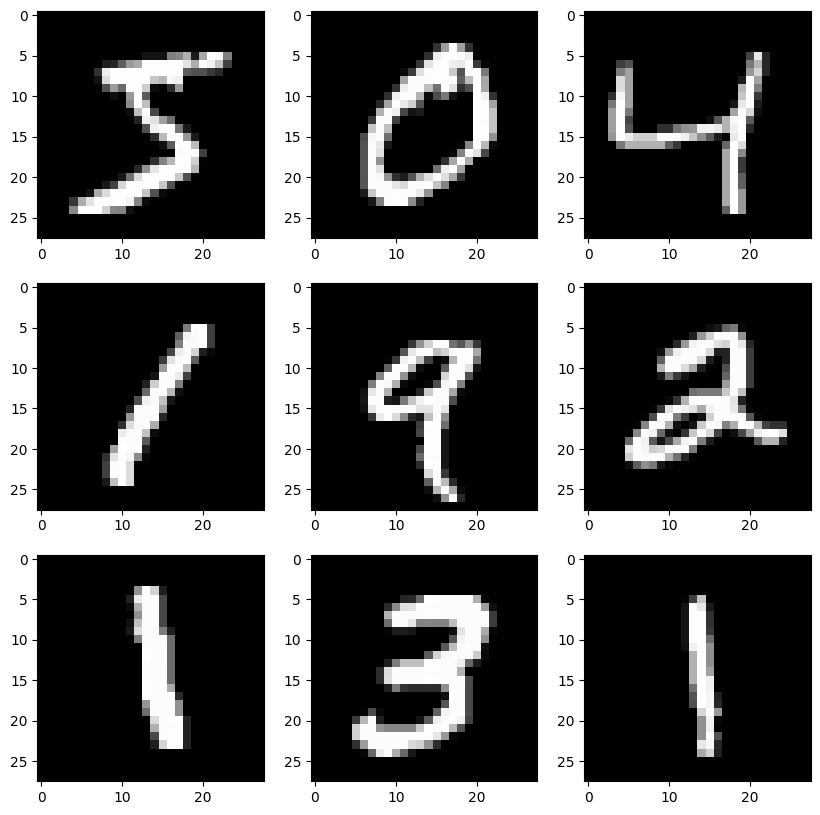

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):
        axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

you create a figure, put the first 9 images into the figure

In [7]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255

normalizing all our data to ensure they are in the range 0 to 1. ensure that the network is stable -> this ensures the gradient of your loss function is not so steep

y is the labels, X is the images

in the code, we are splitting the training set into validation and training set 
- reason for doing this is using the validation set during training will allow you to tune the hyper parameters and prevent overfitting

the test set is also being normalized


In [8]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

all the outputs can be wrapped inside this array, itll return the string format

eg class_names[y_valid[0]] will return the string format of the labe of y_valid[0]

In [1]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28,28])) # input layer
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal")) # hidden layer
model.add(keras.layers.Dense(100, activation="relu", kernel_regularizer= keras.regularizers.l2(0.01))) # hidden layer
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(10, activation = "softmax")) # output layer 

SyntaxError: invalid syntax (4017676025.py, line 4)

you have a 28 to 28 matrix (since you have a 28px by 28px image)

that will be your input layer (first line of code)

NOTE: The Flatten layer converts each 28x28 pixel image into a 1D array of 784 pixels (28*28=784).

.Dense makes it such that every neuron is linked to every neuron

NOTE: ReLU stands for Rectified Linear Unit. It is an activation function defined as f(x) = max(0, x). 

RMB that all activation functions must be non linear so that the neural network can actually make predictions that is not just linear regression

your output layer has 10 neurons -> each neuron represents the probability that the input is a 0, 1, 2 .. or 9

NOTE: The softmax function outputs a probability distribution over the 10 classes. Each output neuron gives a probability that the input image belongs to a particular class.

your kernel initizlizer is the function that determines what weights the nodes in your layer should start with. "he_normal" is usually used in conjunction with relu activation function

kernel regularizers help to prevent overfitting by ensuring the weights are not too high

dropout ensures no overfitting, it does so by dropping out 20% of neurons every epoch -> prevents neurons from co-adapting too much

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimzer=opt)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/#available-optimizers
# https://keras.io/api/metrics/

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

	1.	model.compile:
	•	This method configures the model for training by specifying the loss function, optimizer, and evaluation metrics.
	2.	loss="sparse_categorical_crossentropy":
	•	Loss Function: The loss function measures how well the model’s predictions match the true labels.
	•	Sparse Categorical Crossentropy: This loss function is used for multi-class classification problems where the labels are integers (not one-hot encoded). It computes the cross-entropy loss between the true labels and the predicted probabilities.
	•	Example: If you have 10 classes (digits 0-9), the label for an image of the digit 5 would simply be 5.
	3.	optimizer="sgd":
	•	Optimizer: The optimizer updates the model’s weights based on the loss function’s gradients to minimize the loss.
	•	SGD (Stochastic Gradient Descent): A simple and commonly used optimization algorithm that updates the weights using the gradient of the loss function with respect to each weight. It performs updates using small batches of data.
	4.	metrics=["accuracy"]:
	•	Metrics: Metrics are used to evaluate the performance of the model during training and testing.
	•	Accuracy: The accuracy metric measures the percentage of correct predictions made by the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid), batch_size=32)

Epoch 1/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6124 - accuracy: 0.8396 - val_loss: 0.3049 - val_accuracy: 0.9184
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2867 - accuracy: 0.9175 - val_loss: 0.2352 - val_accuracy: 0.9340
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2335 - accuracy: 0.9338 - val_loss: 0.1975 - val_accuracy: 0.9486
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1995 - accuracy: 0.9431 - val_loss: 0.1745 - val_accuracy: 0.9536
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1744 - accuracy: 0.9501 - val_loss: 0.1589 - val_accuracy: 0.9580
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1542 - accuracy: 0.9559 - val_loss: 0.1408 - val_accuracy: 0.9632
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1381 - accuracy: 0.9609 - val_loss: 0.1350 - val_accuracy:

	1.	history = model.fit:
	•	This method trains the model on the training data for a specified number of epochs and optionally evaluates it on the validation data.
	•	history: The fit method returns a History object that contains the training and validation loss and metrics values at each epoch. This object can be used to analyze the training process.
	2.	X_train, y_train:
	•	Training Data: The input data (X_train) and the corresponding labels (y_train) used to train the model.
	•	X_train: A NumPy array or tensor of training images.
	•	y_train: A NumPy array or tensor of training labels.
	3.	epochs=30:
	•	Number of Epochs: An epoch is one complete pass through the entire training dataset. Setting epochs=30 means the model will be trained for 30 epochs.
	4.	validation_data=(X_valid, y_valid):
	•	Validation Data: A tuple containing the validation data (X_valid) and validation labels (y_valid).
	•	Purpose: The validation data is used to evaluate the model’s performance at the end of each epoch. This helps in monitoring the model’s ability to generalize to unseen data and to detect overfitting.
	5.	batch_size=32:
	•	Batch Size: The number of samples per gradient update. Setting batch_size=32 means the model will update its weights after processing 32 samples.
	•	Reason: Using batches (mini-batches) instead of the entire dataset helps in faster and more stable convergence during training.

batch size: you split your training set into mini batches, after every batch, you will carry out back propagation and update the parameters

epochs is the number of times you will pass the model over the dataset

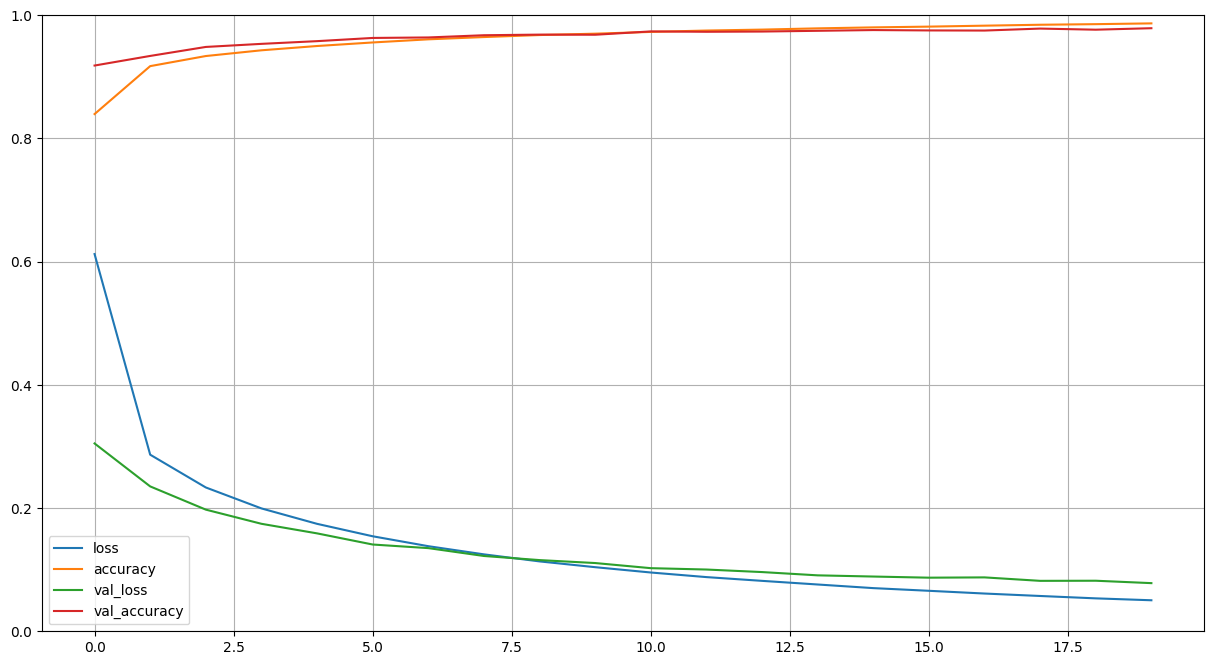

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim (0,1)
plt.show()


loss: how poorly the model is doing based on the data it is given (this is checked via back propagation)
accuracy: how well the model is doing

both are deteermined after every epoch 

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 775us/step - loss: 0.0790 - accuracy: 0.9763


[0.0790252536535263, 0.9763000011444092]

In [ ]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis = -1)
y_classes

313/313 [==============================] - 0s 692us/step


array([7, 2, 1, ..., 4, 5, 6])

y_classes is an array containing the prediction of each letter in X_test

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

confusion matrix allows you to see how different the results are from the actual labels

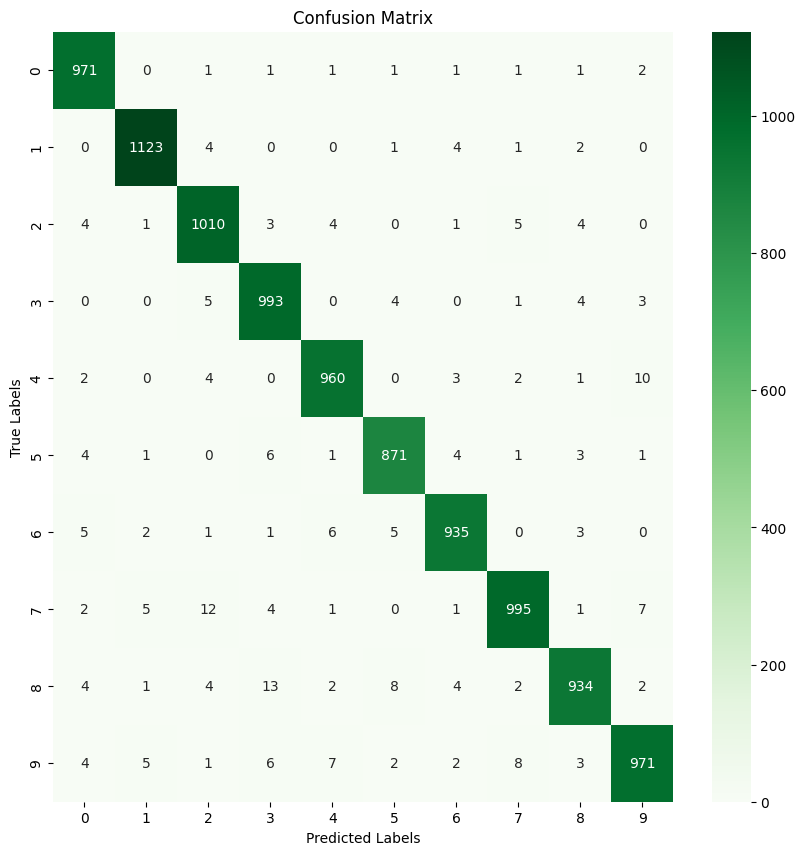

In [ ]:
import seaborn as sb

fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')

fig.set_xlabel('Predicted Labels')
fig.set_ylabel('True Labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)

plt.show()

This means, most of the 0s - 9s were correctly predicted by the trained model